In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import spacy

In [2]:
df = pd.read_csv('data_for_agg/data.csv')
df.sample(10)

,title,pubdate,datestring,categories,article_body,tags,external_links
14,The Climate Bill Can Accelerate a Transformati...,2022-08-11,%Y-%m-%d,blog-post,Congress’s $369 billion climate and energy inv...,Federal Industry Policy,['https://www.aceee.org/policy-brief/2021/09/f...
719,How to make the utility of the future an energ...,2015-06-09,%Y-%m-%d,blog,Utilities have traditionally earned profits by...,Utility Business Models\n \n\n Energy Effi...,['https://aceee.org/about/aceee-staff/martin-k...
277,"Smart Meters Gain Popularity, but Most Utiliti...",2020-01-09,%Y-%m-%d,blog-post,Despite billions of dollars invested in advanc...,Utility Business Models\n \n\n Energy Effi...,"['https://aceee.org/research-report/u2001', 'h..."
423,Car Buyers Rank Fuel Economy as a Top Priority,2018-06-12,%Y-%m-%d,blog,The Trump administration is expected to propos...,Fuel Economy,['https://www.washingtonpost.com/politics/fede...
242,Fuel Economy Rollback Sets the U.S. Further Be...,2020-05-08,%Y-%m-%d,blog-post,The United States will fall well behind leadin...,Fuel Economy\n \n\n Energy Data Sets and R...,['https://www.aceee.org/press-release/2020/03/...
590,Energy-water nexus issues heighten in the face...,2016-08-08,%Y-%m-%d,blog,ACEEE and many others have noted the importanc...,Water-Energy Nexus\n \n\n Energy Efficienc...,['https://aceee.org/blog/2015/06/continuing-co...
302,Saluting Tom Eckman: an IRP legend announces r...,2019-09-27,%Y-%m-%d,blog,Ask just about anyone involved in the utility ...,Industrial Programs\n \n\n Efficiency Pote...,['http://www.nwcouncil.org/energy/powerplan/7/...
187,Arizona Regulators Poised To Expand Efficiency...,2020-10-26,%Y-%m-%d,blog-post,"In a decisive 4-1 vote this month, the biparti...",Utility Business Models\n \n\n Energy Effi...,['https://www.aceee.org/press-release/2020/09/...
26,Are U.S. Cities Reducing Greenhouse Gas Emissi...,2022-06-30,%Y-%m-%d,blog-post,This blog post is the third in a series taking...,None,['https://www.aceee.org/blog-post/2022/01/citi...
217,Thin Triple-pane Windows Brighten U.S. Market:...,2020-07-31,%Y-%m-%d,blog-post,Windows have advanced considerably over the de...,None,['https://www.aceee.org/2020-buildings-summer-...


In [3]:
#Оставляем год-месяц
df['pubdate_y_m'] = df['pubdate'].map(lambda x: '-'.join(x.split('-')[:2]))

In [4]:
def plot_ym(df, year_month_start, year_month_finish):
    
    
    df_sliced = df[df['pubdate_y_m']>=year_month_start][df[df['pubdate_y_m']>=year_month_start]['pubdate_y_m']<=year_month_finish]
    x = df_sliced.groupby(['pubdate_y_m'])['pubdate_y_m'].count().keys()


    plt.figure(figsize=(20,10))
    plt.barh(x, df_sliced.groupby(['pubdate_y_m'])['pubdate_y_m'].count().tolist())
    plt.xlabel("Количество документов", size=15)
    plt.ylabel("год-месяц", size=15)
    plt.title("Агрегация количества документов по месяцу-году", size=17)
    plt.show()

### 1 task

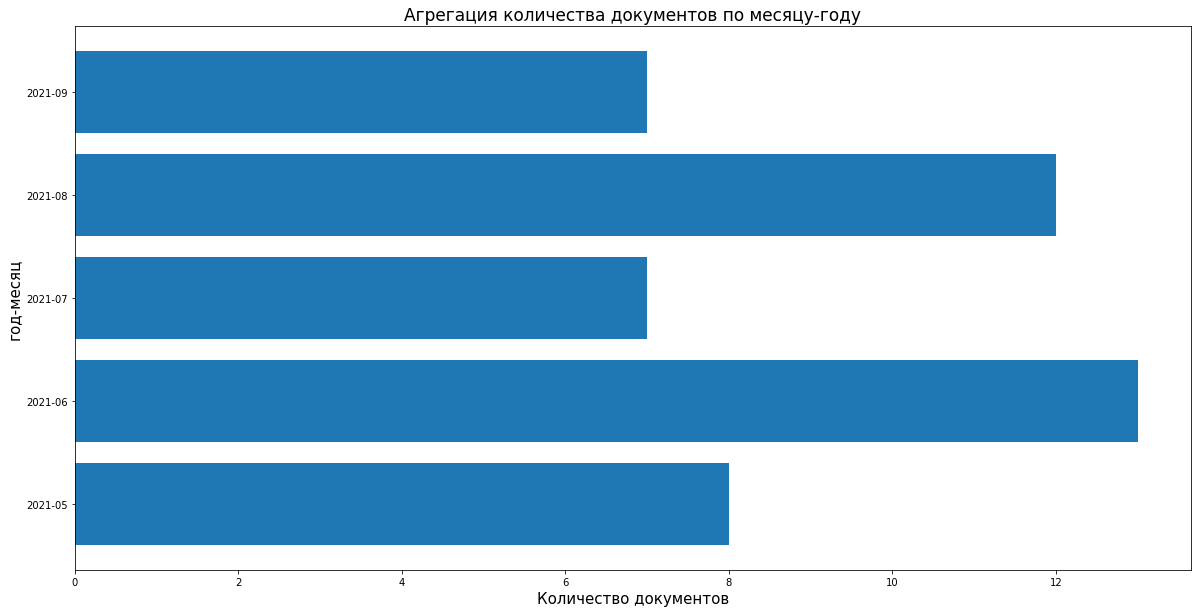

In [5]:
year_month_start, year_month_finish = '2021-05', '2021-09'

plot_ym(df, year_month_start, year_month_finish)

### 2 task

In [6]:
#Добавим аггрегацию по категориям
df_sliced = df[df['pubdate_y_m']>=year_month_start][df[df['pubdate_y_m']>=year_month_start]['pubdate_y_m']<=year_month_finish]
agg_df_ymc = df_sliced.groupby(['pubdate_y_m','categories'])['pubdate_y_m'].count().to_frame()
agg_df_ymc.rename(columns={"pubdate_y_m":"pubdate_y_m_count"},inplace=True)
agg_df_ymc

pubdate_y_m_count
pubdate_y_m categories                      
2021-05     blog-post                      6
            newsletter                     1
            press-release                  1
2021-06     blog-post                     10
            newsletter                     1
            press-release                  2
2021-07     blog-post                      3
            newsletter                     1
            press-release                  3
2021-08     blog-post                      8
            newsletter                     1
            press-release                  3
2021-09     blog-post                      5
            newsletter                     1
            press-release                  1

In [7]:
# Очищаем от предлогов и местоимений
def check(word):
    if word.pos_ == 'ADP' or word.pos_ == 'PRON':
        return False
    else:
        return True

def cleaning(text):
    try:
        doc = nlp(text)
        return ' '.join([str(x) for x in doc if check(x)])
    except:
        #пустой article body
        pass

In [8]:
nlp = spacy.load("en_core_web_sm")
df['article_body_cleaned'] = df['article_body'].map(cleaning)

### 3 task

In [9]:
df.head()

,title,pubdate,datestring,categories,article_body,tags,external_links,pubdate_y_m,article_body_cleaned
0,Energy Efficiency Day: Celebrating the Heart o...,2022-10-05,%Y-%m-%d,blog-post,"Happy Energy Efficiency Day! More than 1,000 l...",None,"['https://energyefficiencyday.org/', 'https://...",2022-10,"Happy Energy Efficiency Day ! More 1,000 local..."
1,October 2022,2022-10-03,%Y-%m-%d,newsletter,Download the Newsletter\n\n\n View PDF\n\n\n B...,None,['/sites/default/files/pdfs/aceee_october_news...,2022-10,Download the Newsletter \n\n\n View PDF \n\n\...
2,Energy Efficiency Day 2022 Is Just Two Weeks Away,2022-09-21,%Y-%m-%d,blog-post,The seventh annual Energy Efficiency Day is ra...,None,"['https://energyefficiencyday.org/', 'https://...",2022-09,The seventh annual Energy Efficiency Day is ra...
3,These ACEEE Staff Love Their Heat Pumps: Here’...,2022-09-15,%Y-%m-%d,blog-post,"If you know ACEEE, you know we champion heat p...",Homes and Multifamily Buildings\n \n\n App...,['https://www.aceee.org/blog-post/2022/07/five...,2022-09,"If know ACEEE , know champion heat pumps becau..."
4,Proposed Model Building Code Could Slash Energ...,2022-09-08,%Y-%m-%d,blog-post,A draft model energy code for commercial build...,Building Policies and Codes\n \n\n Commerc...,['https://www.aceee.org/blog-post/2020/02/acee...,2022-09,A draft model energy code commercial buildings...
